In [1]:
# Simple test for E4407B
# path -----
from pathlib import Path
p = Path.cwd()
sys.path.insert(0, str(p.parent / 'Qcodes_v028x'))

# qcodes imports
import qcodes.instrument_drivers.agilent.E4407B as sa
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id

SA = sa.E4407B('test_SA', 'GPIB0::16::INSTR')

Local qcodes:Qcodes_v028x is imported.
Connected to: Hewlett-Packard E4407B (serial:MY49510151, firmware:A.14.06) in 0.26s


Starting experimental run with id: 24. 
Sweep time: 0.02  sec


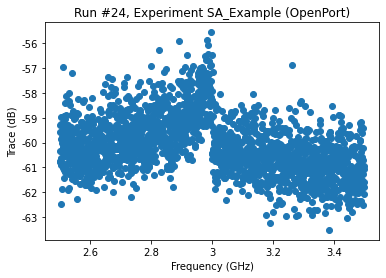

In [2]:
# Run a measurement
meas = Measurement()
meas.register_parameter(SA.trace)

# Set sweep range
SA.center(3e9)
SA.span(1e9)
SA.npts(2001)
with meas.run() as datasaver:
    mag = SA.trace()
    datasaver.add_result((SA.trace, mag))
    dataid = datasaver.run_id
plot_by_id(dataid)

print('Sweep time:', SA.sweep_time(), ' sec')